In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import re
from collections import Counter
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

recipes = pd.read_csv("C:/Users/catsu/Desktop/recipes.csv",  delimiter=',')
print(recipes.head())

                             Name  \
0       Prosciutto Breakfast Bake   
1  Vegan Paleo Vegetable Pancakes   
2    Salmon and Asparagus in Foil   
3     Honey Ginger Grilled Salmon   
4      Cauliflower Grilled Cheese   

                                         Description  \
0  Great breakfast or brunch idea. The capsicum s...   
1  Make and share this Vegan Paleo Vegetable Panc...   
2  This is a quick and easy dinner.  Pop the pack...   
3  Make and share this Honey Ginger Grilled Salmo...   
4  Make and share this Cauliflower Grilled Cheese...   

                                         Ingredients  Prep Time (minutes)  \
0  20   g    prosciutto (one slice), 1   large   ...                   20   
1  1   small    zucchini, 1   medium    yellow sq...                   20   
2  4   sheets    aluminum foil, wrap  (12-inch by...                   35   
3  1   teaspoon    ground ginger, 1   teaspoon   ...                   35   
4  20   ounces   cauliflower rice (about 6 cups),...   

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\catsu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\catsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
# Check for missing values
print(recipes.isnull().sum())

# Convert columns to appropriate data types if necessary
recipes['Calories'] = pd.to_numeric(recipes['Calories'], errors='coerce')
recipes['Fat Content'] = pd.to_numeric(recipes['Fat Content'], errors='coerce')
recipes['Saturated Fat Content'] = pd.to_numeric(recipes['Saturated Fat Content'], errors='coerce')
recipes['Cholesterol Content'] = pd.to_numeric(recipes['Cholesterol Content'], errors='coerce')
recipes['Sodium Content'] = pd.to_numeric(recipes['Sodium Content'], errors='coerce')
recipes['Carbohydrate Content'] = pd.to_numeric(recipes['Carbohydrate Content'], errors='coerce')
recipes['Fiber Content'] = pd.to_numeric(recipes['Fiber Content'], errors='coerce')
recipes['Sugar Content'] = pd.to_numeric(recipes['Sugar Content'], errors='coerce')
recipes['Protein Content'] = pd.to_numeric(recipes['Protein Content'], errors='coerce')


Name                      0
Description               0
Ingredients               0
Prep Time (minutes)       0
Serves                   11
Directions                0
Calories                  0
Fat Content               0
Saturated Fat Content     0
Cholesterol Content       0
Sodium Content            0
Carbohydrate Content      0
Fiber Content             0
Sugar Content             0
Protein Content           0
dtype: int64


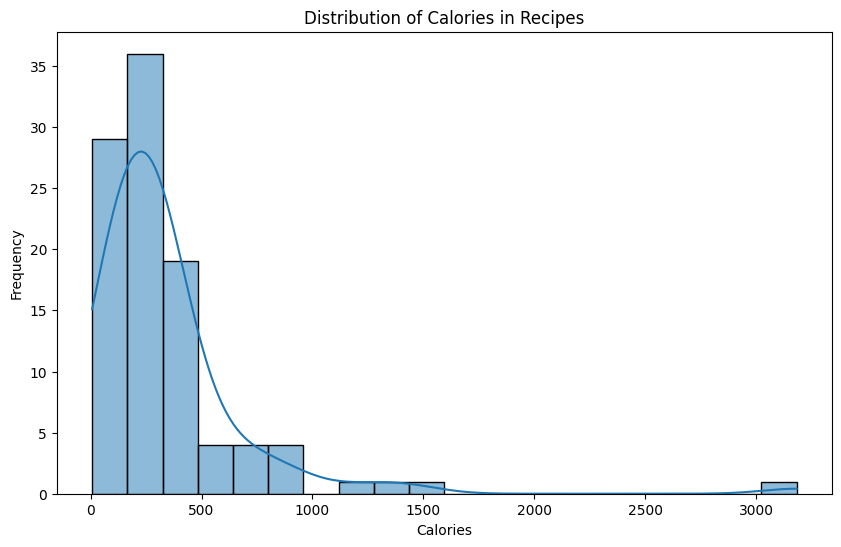

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(recipes['Calories'].dropna(), bins=20, kde=True)
plt.title('Distribution of Calories in Recipes')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


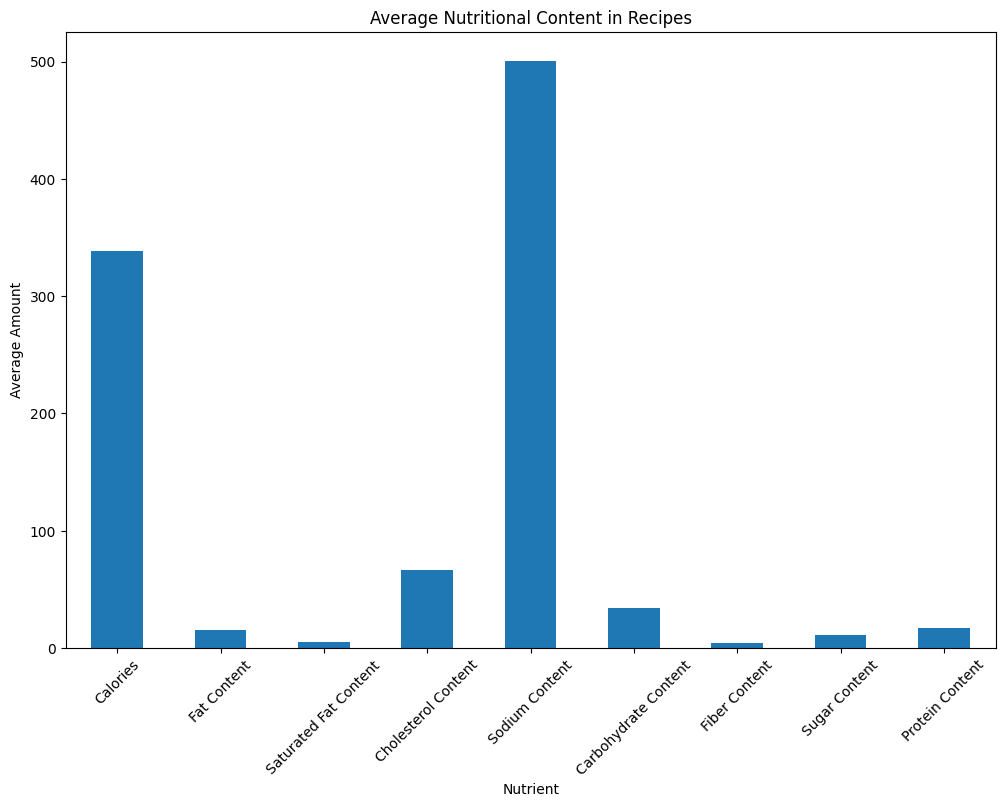

In [15]:
nutrients = ['Calories', 'Fat Content', 'Saturated Fat Content', 'Cholesterol Content', 'Sodium Content', 
             'Carbohydrate Content', 'Fiber Content', 'Sugar Content', 'Protein Content']

avg_nutrients = recipes[nutrients].mean()

plt.figure(figsize=(12, 8))
avg_nutrients.plot(kind='bar')
plt.title('Average Nutritional Content in Recipes')
plt.xlabel('Nutrient')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.show()


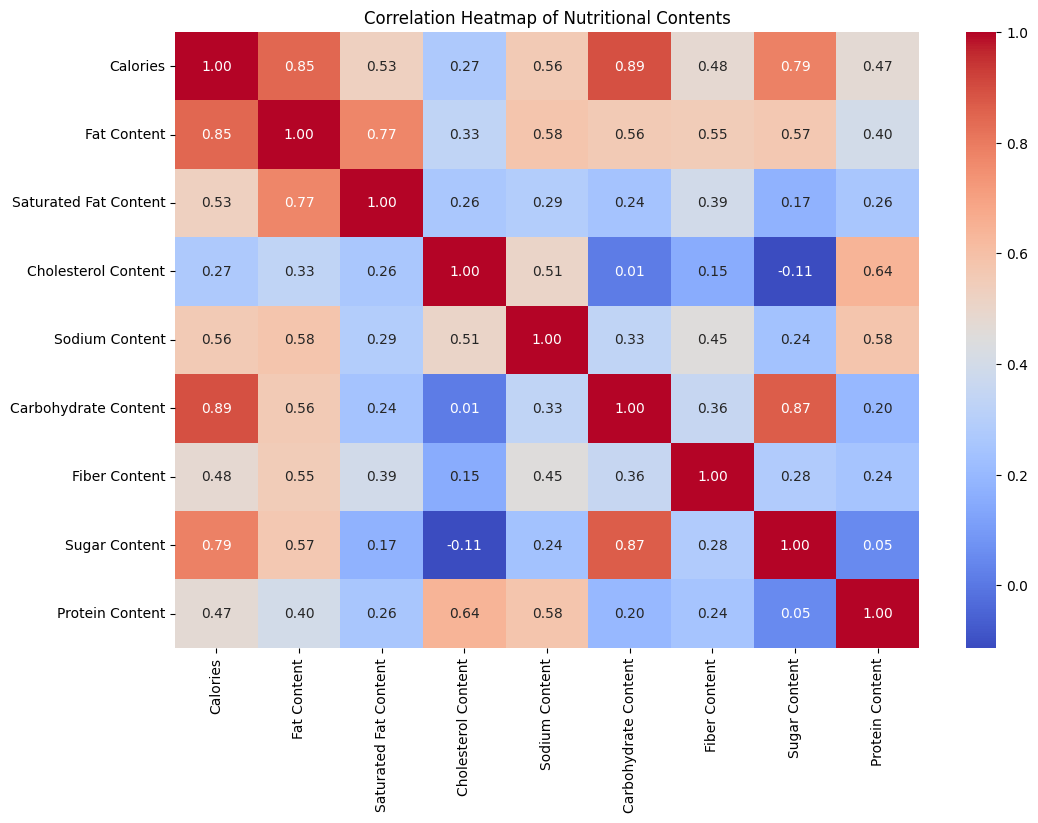

In [16]:
nutrients = ['Calories', 'Fat Content', 'Saturated Fat Content', 'Cholesterol Content', 'Sodium Content', 
             'Carbohydrate Content', 'Fiber Content', 'Sugar Content', 'Protein Content']
plt.figure(figsize=(12, 8))
sns.heatmap(recipes[nutrients].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nutritional Contents')
plt.show()


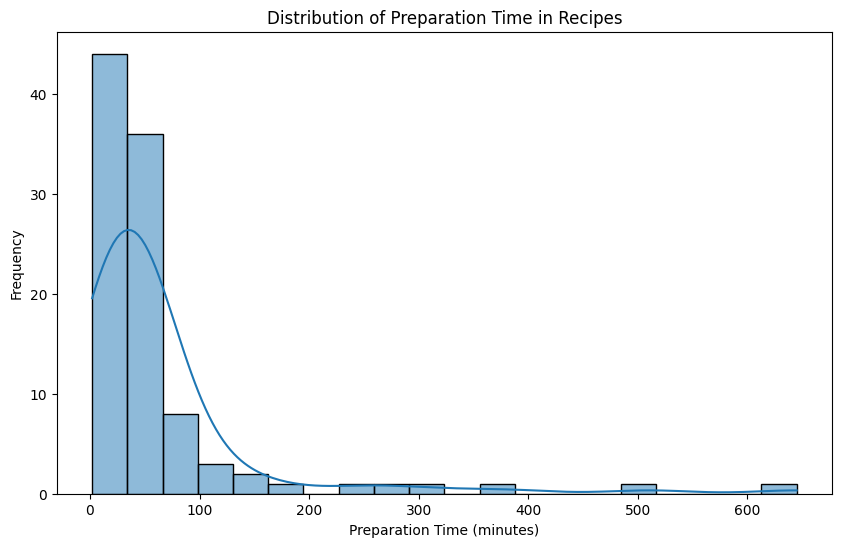

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(recipes['Prep Time (minutes)'].dropna(), bins=20, kde=True)
plt.title('Distribution of Preparation Time in Recipes')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()


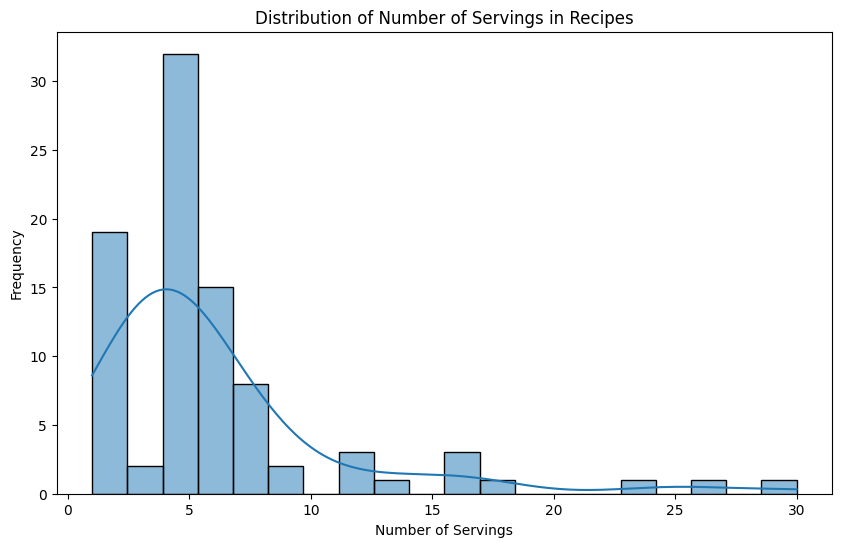

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(recipes['Serves'].dropna(), bins=20, kde=True)
plt.title('Distribution of Number of Servings in Recipes')
plt.xlabel('Number of Servings')
plt.ylabel('Frequency')
plt.show()


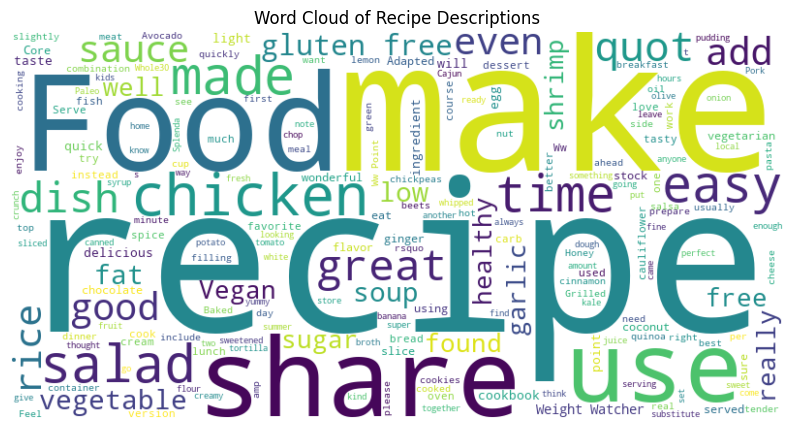

In [19]:
text = ' '.join(recipes['Description'].dropna())

# Kelime bulutunu oluşturma
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Recipe Descriptions')
plt.axis('off')
plt.show()



C:\Users\catsu\AppData\Local\Temp\ipykernel_3228\4024671125.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Ingredient', data=common_ingredients_df, palette='viridis')


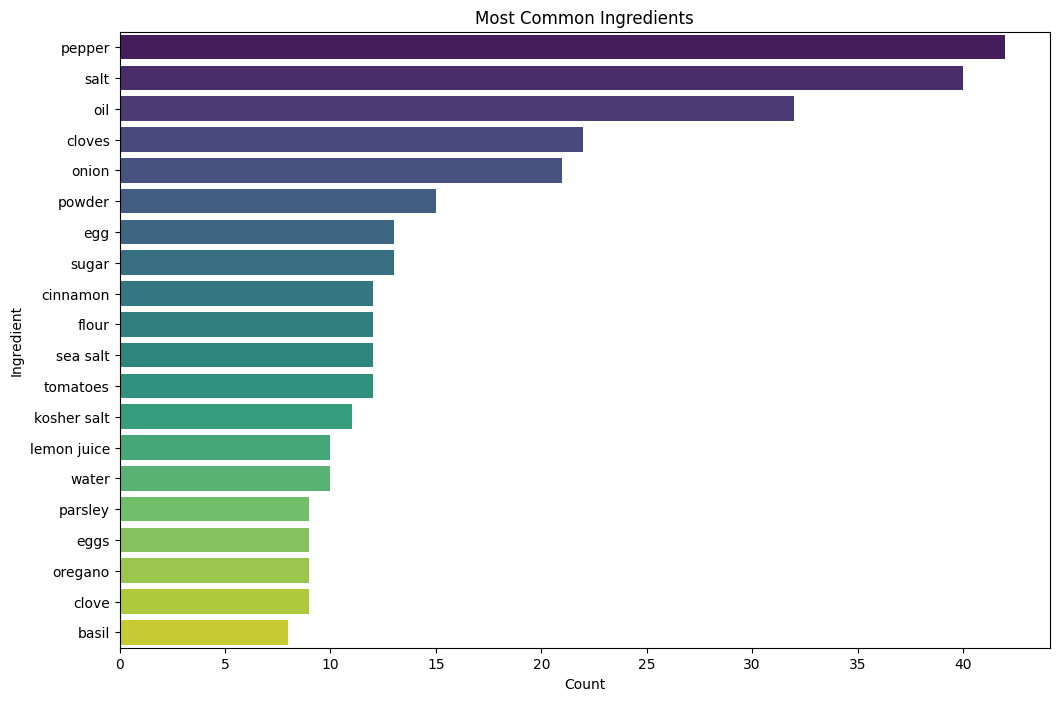

In [20]:
def extract_ingredients(ingredient_str):
    # Split by commas first, then clean each ingredient
    ingredients_list = [ingredient.strip() for ingredient in ingredient_str.split(',')]
    
    # Define a pattern to remove quantities, units, and common descriptors
    pattern = r'^\d+(\s*\d+\/\d+)?\s*(cups?|teaspoons?|tablespoons?|tsps?|tbsps?|ounces?|oz|grams?|g|lbs?|pounds?|pcs?|pieces?|slices?|cloves?|pinches?|dash|bunch|cans?|packets?|sticks?|head|bottle|bottles|bag|bags|quart|quarts|pint|pints|milliliter|milliliters|ml|liter|liters|kg|kilogram|kilograms?)\s*'
    descriptors = ['chopped', 'diced', 'minced', 'sliced', 'crushed', 'grated', 'peeled', 'cooked', 'raw', 'fresh', 'teaspoon','dried', 'ground', 'whole', 'halved', 'quartered', 'finely', 'roughly', 'thinly', 'thickly', 'large', 'small', 'medium', 'optional', 'to', 'taste']

    # Clean each ingredient
    cleaned_ingredients = []
    for ingredient in ingredients_list:
        # Remove quantities and units
        ingredient = re.sub(pattern, '', ingredient, flags=re.IGNORECASE)
        
        # Remove unwanted characters like parentheses and additional spaces
        ingredient = re.sub(r'\([^)]*\)', '', ingredient)  # Remove text within parentheses
        ingredient = ingredient.strip()  # Remove leading and trailing spaces
        
        # Tokenize and POS tag
        words = word_tokenize(ingredient)
        tagged_words = pos_tag(words)
        
        # Keep only nouns and filter out common descriptors
        nouns = [word for word, pos in tagged_words if pos.startswith('NN') and word.lower() not in descriptors]
        cleaned_ingredient = ' '.join(nouns)
        
        if cleaned_ingredient:  # Ensure the ingredient is not empty after cleaning
            cleaned_ingredients.append(cleaned_ingredient)
    
    return cleaned_ingredients

# Aggregate all ingredients into a single list
all_ingredients = []
for ingredients in recipes['Ingredients'].dropna():
    all_ingredients.extend(extract_ingredients(ingredients))

# Count the occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Get the 20 most common ingredients
common_ingredients = ingredient_counts.most_common(20)

# Convert to a DataFrame for visualization
common_ingredients_df = pd.DataFrame(common_ingredients, columns=['Ingredient', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Ingredient', data=common_ingredients_df, palette='viridis')
plt.title('Most Common Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()


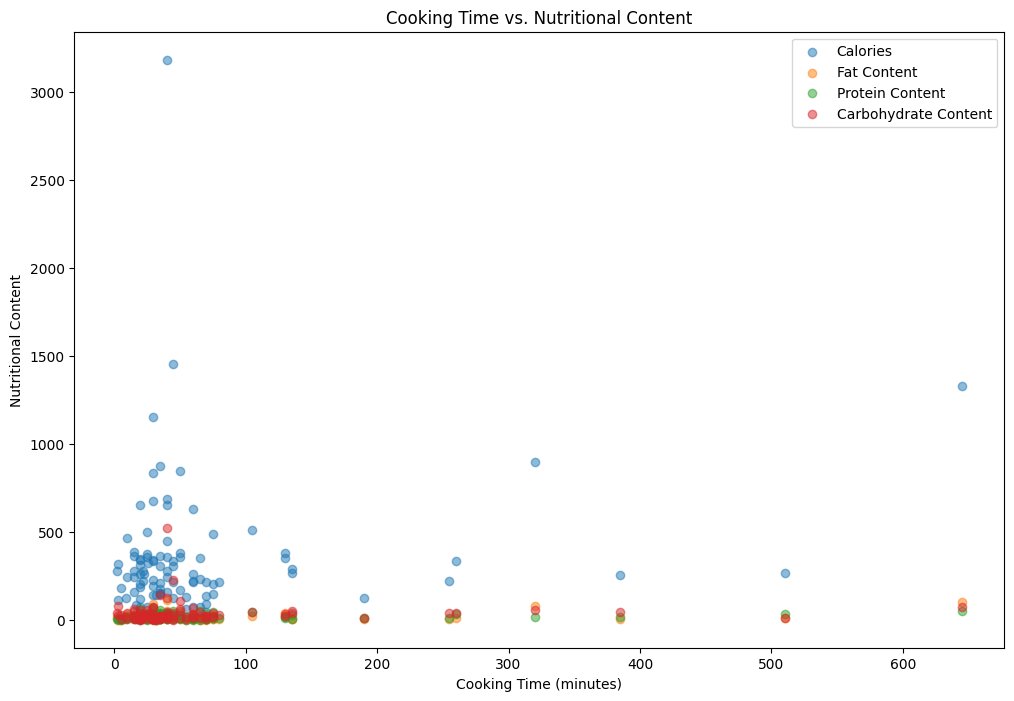

In [24]:
# Drop rows with missing values in cooking time or nutritional content
recipes.dropna(subset=['Prep Time (minutes)', 'Calories'], inplace=True)

# Create scatter plots
nutrients = ['Calories', 'Fat Content', 'Protein Content', 'Carbohydrate Content']

plt.figure(figsize=(12, 8))
for nutrient in nutrients:
    plt.scatter(recipes['Prep Time (minutes)'], recipes[nutrient], alpha=0.5, label=nutrient)

plt.title('Cooking Time vs. Nutritional Content')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Nutritional Content')
plt.legend()
plt.show()

